In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape

(3501, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


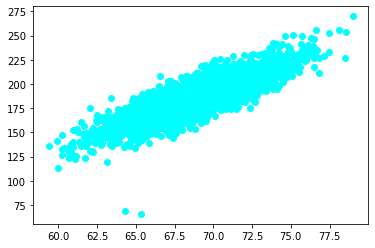

In [7]:
plt.scatter(df.Height , df.Weight, color='cyan')

Text(0, 0.5, 'Weight')

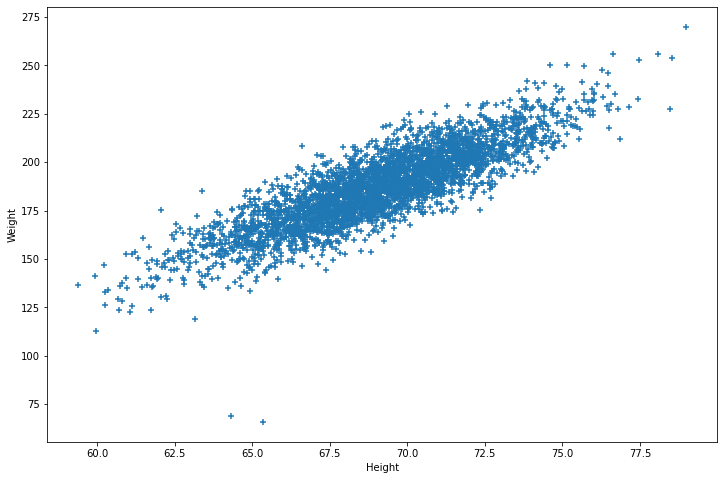

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height , df.Weight,marker='+') 
plt.xlabel('Height')
plt.ylabel('Weight')

In [9]:
df.Height.mean()

69.02441087268797

In [10]:
df.Weight.mean()

186.89125797946284

In [11]:
x = df[['Height']]  
y = df['Weight'] 

# Split the dataset

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [14]:
xtrain.shape

(2450, 1)

In [15]:
xtrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [16]:
ytrain.head()

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
Name: Weight, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression() 

In [19]:
lr.fit(xtrain ,ytrain)

LinearRegression()

In [20]:
lr.coef_

array([5.97744946])

In [21]:
lr.intercept_

-225.82603000755844

In [22]:
m = lr.coef_
c = lr.intercept_

In [23]:
x = 74.110105
y = (m * x) + c

In [24]:
y

array([217.16337723])

In [25]:
lr.predict([[74.110105]])

array([217.16337723])

In [26]:
lr.predict(df[['Height']])

array([215.59078213, 185.31432533, 217.16337956, ..., 215.98249712,
       177.03027812, 208.96748706])

In [27]:
df['Predicted Weight'] = lr.predict(df[['Height']])

In [28]:
df.head()

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873


In [29]:
testing = lr.predict(xtest)

In [30]:
testing

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [31]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202829
Name: Weight, Length: 1051, dtype: float64

In [32]:
xtest['pred'] = lr.predict(xtest)

In [33]:
xtest.head()

,Height,pred
719,67.402821,177.070927
2296,69.560033,189.965551
3083,65.809912,167.549393
1296,67.687531,178.772764
2234,65.077902,163.173840


In [34]:
xtest = xtest[['Height']]

In [35]:
from sklearn.metrics import mean_squared_error 
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred)

In [36]:
mse

110.89221516932378

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
mean_absolute_error(ytest, pred)

8.279688660993672

In [39]:
lr.predict([[90]])

array([312.14442154])

Text(0, 0.5, 'Weight')

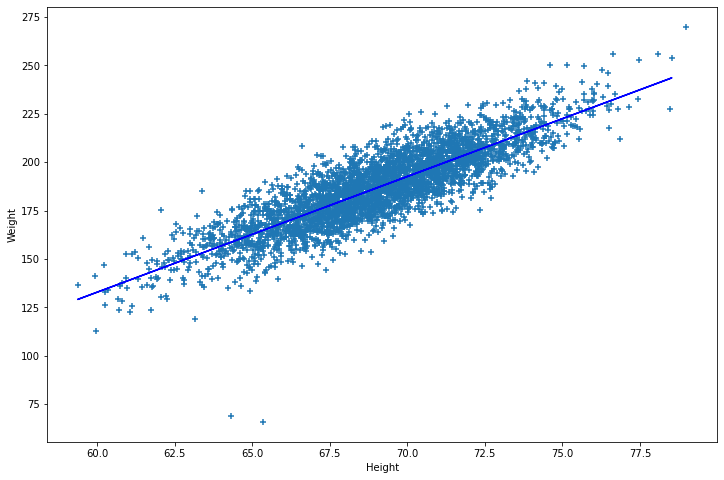

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(df['Height'] , df['Weight'],marker='+') 
plt.plot(xtest , lr.predict(xtest), color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

Text(0, 0.5, 'Weight')

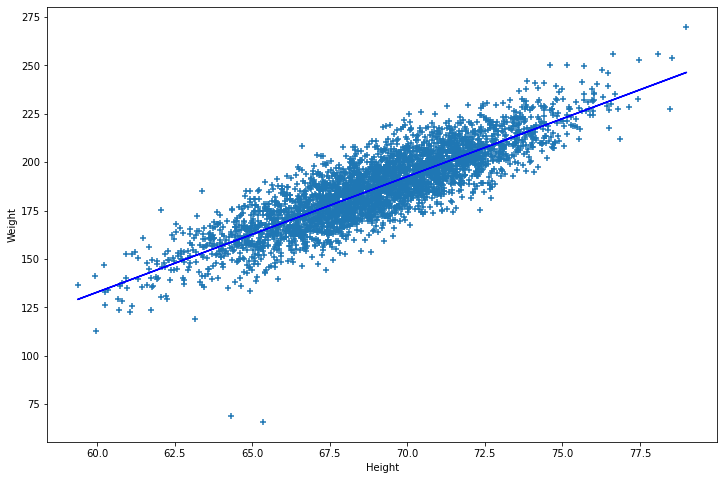

In [42]:
plt.figure(figsize=(12,8)) 
plt.scatter(df['Height'] , df['Weight'],marker='+') 
plt.plot(df[['Height']] , lr.predict(df[['Height']]), color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')

In [43]:
lr.score(xtest, ytest)

0.7313258168853622

In [44]:
lr.score(df[['Height']], df.Weight)

0.7323100609319788

In [45]:
lr.score(xtrain, ytrain)

0.7327243206606744